## Student Perfomance

In [1]:
# importing all libraries
import pandas as pd 

## Importing Dataset

In [2]:
data = pd.read_csv('./Student_Performance.csv')
data['Previous Scores'].describe()

count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64

## Outlier

C:\Users\nitin\AppData\Local\Temp\ipykernel_6656\2905113366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Hours Studied'])


<Axes: xlabel='Hours Studied', ylabel='Density'>

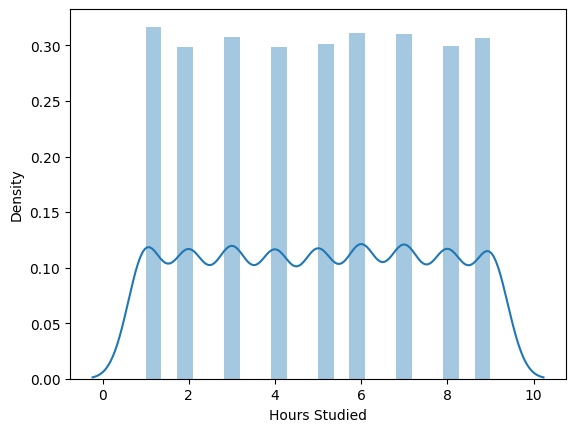

In [3]:
import seaborn as sb 
sb.distplot(data['Hours Studied'])

## independent vs dependent variable

In [4]:
y_data = data['Performance Index']
x_data = data.drop(columns=['Performance Index'])

x_data.shape, y_data.shape

((10000, 5), (10000,))

## spilting

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,random_state=2)

## Categorical encoding

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression

encoding_curricular = ColumnTransformer(transformers=[
    ('ordinal curriculam',OrdinalEncoder(categories=[['Yes','No']]),[2])
],remainder='passthrough')

scaling = ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),[0,1,2,3])
],remainder='passthrough')

model = LinearRegression()

## Model


In [7]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('step 1',encoding_curricular),
    ('step 2',scaling),
    ('model',model)
],)


## prediction


In [8]:
from sklearn.metrics import r2_score

pipe.fit(X=x_train,y=y_train)
y_pred = pipe.predict(x_test)
r2_score(y_true=y_test,y_pred=y_pred)

0.9891497363536331

## Exporting Model/Pipeline

In [9]:
import pickle as pk 
pk.dump(pipe,open('../model.pkl','wb'))